In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob 
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from skimage.io import imread


In [3]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [4]:
##Import libraries
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [5]:
IMAGE_SIZE = 64
# Base model with MobileNetV2
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

In [6]:
base_model = keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

In [7]:
base_model.trainable = False

In [8]:
# Trainable classification head
maxpool_layer = keras.layers.GlobalMaxPooling2D()
prediction_layer = keras.layers.Dense(1, activation='sigmoid')

In [9]:
#learning_rate = 0.0001

classifier = keras.Sequential([
    base_model,
    maxpool_layer,
    prediction_layer
])

In [10]:
classifier.compile(optimizer=keras.optimizers.Adam(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [11]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [12]:
## Scaling test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_set = train_datagen.flow_from_directory(r"C:\Users\Nanda Kumar\Downloads\chest-xray-images-for-classification-pneumonia/pneumonia/train",
                                               target_size=(64, 64),
                                               batch_size=6,
                                               class_mode='binary')

Found 3513 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory(r"C:\Users\Nanda Kumar\Downloads\chest-xray-images-for-classification-pneumonia/pneumonia/test",
                                               target_size=(64, 64),
                                               batch_size=6,
                                               class_mode='binary')

Found 1171 images belonging to 2 classes.


In [15]:
#which is normal which is abnormal?
label_map = (train_set.class_indices)
print(label_map)

{'NORMAL': 0, 'PNEUMONIA': 1}


In [16]:
## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=98,
        epochs=10,
        validation_data=test_set,
        validation_steps=38)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
98/98 [==============================] - 99s 1s/step - loss: 0.5171 - accuracy: 0.7092 - val_loss: 0.4577 - val_accuracy: 0.8070
Epoch 2/10
98/98 [==============================] - 99s 1s/step - loss: 0.4483 - accuracy: 0.8044 - val_loss: 0.4026 - val_accuracy: 0.8991
Epoch 3/10
98/98 [==============================] - 100s 1s/step - loss: 0.4049 - accuracy: 0.8282 - val_loss: 0.3573 - val_accuracy: 0.8991
Epoch 4/10
98/98 [==============================] - 100s 1s/step - loss: 0.3561 - accuracy: 0.8469 - val_loss: 0.3248 - val_accuracy: 0.8991
Epoch 5/10
98/98 [==============================] - 98s 995ms/step - loss: 0.3528 - accuracy: 0.8410 - val_loss: 0.3044 - val_accuracy: 0.9035
Epoch 6/10
98/98 [==============================] - 99s 1s/step - loss: 0.3471 - accuracy: 0.8452 - val_loss: 0.2964 - val_accuracy: 0.9254
Epoch 7/10
98/98 [==============================] - 99s 1s/st

In [17]:
## prediction of single new data
import numpy as np
import keras
from keras.preprocessing import image

In [18]:
import PIL

In [19]:
test_image= image.load_img(r"C:\Users\Nanda Kumar\Downloads\chest-xray-images-for-classification-pneumonia\pneumonia\train\NORMAL\IM-0003-0001.jpeg",target_size =(64,64))

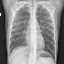

In [20]:
test_image

In [21]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [22]:
test_image

array([[[ 34.,  34.,  34.],
        [ 43.,  43.,  43.],
        [ 89.,  89.,  89.],
        ...,
        [143., 143., 143.],
        [126., 126., 126.],
        [115., 115., 115.]],

       [[ 34.,  34.,  34.],
        [ 22.,  22.,  22.],
        [ 85.,  85.,  85.],
        ...,
        [142., 142., 142.],
        [122., 122., 122.],
        [111., 111., 111.]],

       [[ 38.,  38.,  38.],
        [ 26.,  26.,  26.],
        [ 77.,  77.,  77.],
        ...,
        [136., 136., 136.],
        [123., 123., 123.],
        [100., 100., 100.]],

       ...,

       [[ 39.,  39.,  39.],
        [ 39.,  39.,  39.],
        [ 38.,  38.,  38.],
        ...,
        [ 33.,  33.,  33.],
        [ 35.,  35.,  35.],
        [ 37.,  37.,  37.]],

       [[ 42.,  42.,  42.],
        [ 39.,  39.,  39.],
        [ 40.,  40.,  40.],
        ...,
        [ 34.,  34.,  34.],
        [ 32.,  32.,  32.],
        [ 33.,  33.,  33.]],

       [[ 36.,  36.,  36.],
        [ 42.,  42.,  42.],
        [ 40.,  

In [23]:
## For single prediction change the dimension using axis. To remove problem of batch
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)

In [24]:
## Class of normal and abnormal

if result[0][0] == 1:
    prediction = 'normal'
else:
   prediction = 'abnormal'

In [25]:
prediction

'abnormal'

In [26]:
test_image

array([[[[ 34.,  34.,  34.],
         [ 43.,  43.,  43.],
         [ 89.,  89.,  89.],
         ...,
         [143., 143., 143.],
         [126., 126., 126.],
         [115., 115., 115.]],

        [[ 34.,  34.,  34.],
         [ 22.,  22.,  22.],
         [ 85.,  85.,  85.],
         ...,
         [142., 142., 142.],
         [122., 122., 122.],
         [111., 111., 111.]],

        [[ 38.,  38.,  38.],
         [ 26.,  26.,  26.],
         [ 77.,  77.,  77.],
         ...,
         [136., 136., 136.],
         [123., 123., 123.],
         [100., 100., 100.]],

        ...,

        [[ 39.,  39.,  39.],
         [ 39.,  39.,  39.],
         [ 38.,  38.,  38.],
         ...,
         [ 33.,  33.,  33.],
         [ 35.,  35.,  35.],
         [ 37.,  37.,  37.]],

        [[ 42.,  42.,  42.],
         [ 39.,  39.,  39.],
         [ 40.,  40.,  40.],
         ...,
         [ 34.,  34.,  34.],
         [ 32.,  32.,  32.],
         [ 33.,  33.,  33.]],

        [[ 36.,  36.,  36.],
       